In [1]:
#Carregando as bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Resetar o gerador de numeros randômicos
np.random.seed(0)

In [3]:
# Definir o número de atributos (features)
number_of_features = 1000

In [4]:
# Carregar os dados (conjunto de dados de avaliacao de filmes)
(data_train, target_train), (data_test, target_test) = imdb.load_data(num_words=number_of_features)

In [5]:
# Converter o formato de dados para matriz de features
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

In [6]:
# Instancia a rede neural
network = models.Sequential()

In [7]:
# Adicionar a primeira camada com a função de ativacao Relu
network.add(layers.Dense(units=16, activation="relu", input_shape=(number_of_features,)))

In [8]:
# Adiciona a segunda camada com a função de ativação Relu
network.add(layers.Dense(units=16, activation="relu"))

In [9]:
# Adiciona a terceira camada coma função de ativação sigmoid
network.add(layers.Dense(units=1, activation="sigmoid"))

In [10]:
#Compilar a rede neural
network.compile(loss="binary_crossentropy", # Cross-entropy
                optimizer="rmsprop", # Root Mean Square Propagation
                metrics=["accuracy"]) # Acuracia como metrica de desempenho

In [11]:
#Treinar a rede neural
history = network.fit(features_train, # Atributos
                      target_train, # Classes
                      epochs=3, # Número de época
                      verbose=1, # Imprimir informações de cada época
                      batch_size=100, #Número de observações a cada mini-lote
                      validation_data=(features_test, target_test)) #Dados de teste

Epoch 1/3
250/250 [==============================] - 4s 8ms/step - loss: 0.4381 - accuracy: 0.8032 - val_loss: 0.3371 - val_accuracy: 0.8569
Epoch 2/3
250/250 [==============================] - 1s 5ms/step - loss: 0.3235 - accuracy: 0.8654 - val_loss: 0.3286 - val_accuracy: 0.8591
Epoch 3/3
250/250 [==============================] - 1s 5ms/step - loss: 0.3129 - accuracy: 0.8696 - val_loss: 0.3475 - val_accuracy: 0.8495


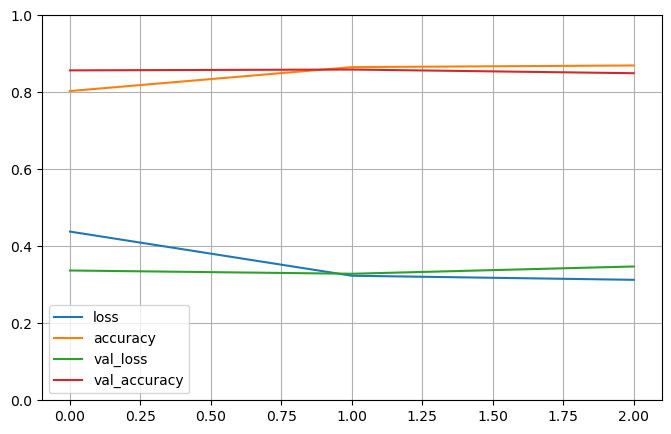

In [12]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()